**I love everything that’s old, — old friends, old times, old manners, old books, old wine. — Oliver Goldsmith**

# Importing Libraries and Data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn import metrics
from imblearn.over_sampling import SMOTE

Reading Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/winequality-red.csv', sep=';')

Next, I wanted to get a better idea of what I was working with.

In [3]:
print("Rows, columns: " + str(df.shape))
print('______________________________________________')
df.head()

Rows, columns: (1599, 12)
______________________________________________


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Missing Values

In [4]:
print('Missing value in : \n' + str(df.isna().sum()))

Missing value in : 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


And The Data Types

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Exploring Variables

Histogram of quality variable

In [11]:
# plot Histogram to visualize the quality distribution

fig = px.histogram(df, x='quality', width=800, height=400,)
fig.show()

 Heatmap for Correlation

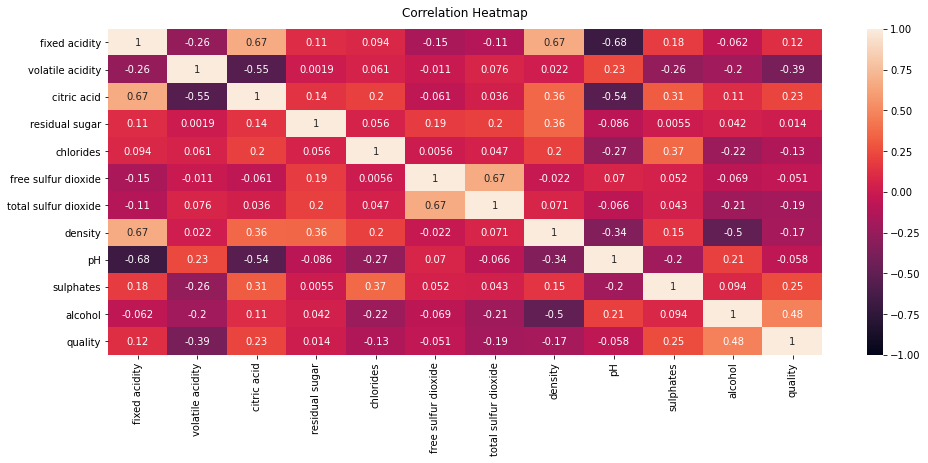

In [5]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

'''
 Store heatmap object in a variable to easily access it when you want to include more features (such as title).
 Set the range of values to be displayed on the colormap from -1 to 1,
 and set the annotation to True to display the correlation values on the heatmap.
 '''

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Convert to a Classification Problem

Converting it to binary classification 

In [12]:
# Create Classification version of target variable
df['GoodQuality'] = [1 if x>=7 else 0 for x in df['quality']]

# Separete feature variables and target variable
X = df.drop(['quality', 'GoodQuality'], axis=1)
y = df['GoodQuality']

**Proportion of Good vs Bad Wines**

In [13]:
# See proportion of good vs bad wines
df['GoodQuality'].value_counts()

0    1382
1     217
Name: GoodQuality, dtype: int64

We can see that data is clearly Unblanaced, we will take of it later.

# Preparing Data for Modelling

**Standardizing Feature Variables**


In [14]:
# Normalize feature variables
X = StandardScaler().fit_transform(X)

**Split data into Train and Test**


In [15]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Modelling


*For this project, I wanted to compare five different machine learning models: decision trees, random forests, AdaBoost, Gradient Boost, and XGBoost. For the purpose of this project, I wanted to compare these models by their accuracy.*

### Model 1: Decision Tree

In [16]:
# Defining Model
dt_clf = DecisionTreeClassifier(random_state=1)

# Fitting the model
dt_clf.fit(X_train, y_train)

# Prediction 
dt_pred = dt_clf.predict(X_test)

### Model 2: Random Forest

In [17]:
# Defining Model
rf_clf = RandomForestClassifier(random_state=1)

# Fitting the model
rf_clf.fit(X_train, y_train)

# Prediction 
rf_pred = rf_clf.predict(X_test)

### Model 3: AdaBoost

In [18]:
# Defining Model
ab_clf = AdaBoostClassifier(random_state=1)

# Fitting the model
ab_clf.fit(X_train, y_train)

# Prediction 
ab_pred = ab_clf.predict(X_test)

### Model 4: Gradient Boosting

In [19]:
# Defining Model
gb_clf = GradientBoostingClassifier(random_state=1)

# Fitting the model
gb_clf.fit(X_train, y_train)

# Prediction 
gb_pred = gb_clf.predict(X_test)

### Model 5: XGBoost

In [20]:
# Defining Model
xg_clf = xgb.XGBClassifier(random_state=1)

# Fitting the model
xg_clf.fit(X_train, y_train)

# Prediction 
xg_pred = gb_clf.predict(X_test)

# Checking the Accuracy & Classification Report of the Classification models

In [21]:
# calculating the training and testing accuracies
print("1-------------Decision Tree-------------------------------")
print("Training accuracy :", dt_clf.score(X_train, y_train))
print("Testing accuracy :", dt_clf.score(X_test, y_test))
print(classification_report(y_test, dt_pred))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print("2-------------Random Forest-------------------------------")
print("Training accuracy :", rf_clf.score(X_train, y_train))
print("Testing accuracy :", rf_clf.score(X_test, y_test))
print(classification_report(y_test, rf_pred))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print("3-------------AdaBoost-------------------------------")
print("Training accuracy :", ab_clf.score(X_train, y_train))
print("Testing accuracy :", ab_clf.score(X_test, y_test))
print(classification_report(y_test, ab_pred))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print("4-------------Gradient Boosting-------------------------------")
print("Training accuracy :", gb_clf.score(X_train, y_train))
print("Testing accuracy :", gb_clf.score(X_test, y_test))
print(classification_report(y_test, gb_pred))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print("5-------------XGBoost-------------------------------")
print("Training accuracy :", xg_clf.score(X_train, y_train))
print("Testing accuracy :", xg_clf.score(X_test, y_test))
print(classification_report(y_test, xg_pred))



1-------------Decision Tree-------------------------------
Training accuracy : 1.0
Testing accuracy : 0.8975
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2-------------Random Forest-------------------------------
Training accuracy : 1.0
Testing accuracy : 0.9225
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
3-------------AdaBoost----------------------------

# Conclusion

**Random Forest has better F1 Score for predicting Good Quality wine.**

*So i will go with Random forest*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



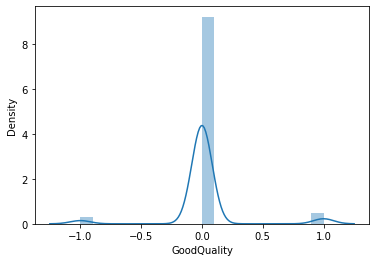

In [23]:
# Ploting DistPlot
sns.distplot(y_test-rf_pred)

# Hyper Parameter Tunning

In [24]:
# Number of trees in random forest
n_estimators = [200,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [4,5,6,7,8]
# 
criterion = ['gini','entropy']


In [25]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion
}
print(param_grid)


{'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}


In [27]:
# Defining GridSearchCV with initial parameters
rf_Grid = GridSearchCV(estimator = rf_clf, param_grid = param_grid, cv = 5, n_jobs = 1)

In [28]:
# Fitting the GridSearchCV
rf_Grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

we have our best parameter

In [30]:
rf_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [31]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.982
Test Accuracy - : 0.917


In [32]:
# Prediction
rf_Grid_pred=rf_Grid.predict(X_test)

In [33]:
# Classification Report
print(classification_report(y_test, rf_Grid_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       355
           1       0.66      0.56      0.60        45

    accuracy                           0.92       400
   macro avg       0.80      0.76      0.78       400
weighted avg       0.91      0.92      0.91       400



In [34]:
# confucion matrix
print(metrics.confusion_matrix(y_test,rf_Grid_pred))

[[342  13]
 [ 20  25]]


# SMOTE
**Balancing the Dataset**

In [35]:
# Defining and fitting Smote to perform upSampling
sm = SMOTE()
Xr, yr = sm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [36]:
# Normalize feature variables
Xr = StandardScaler().fit_transform(Xr)

In [49]:
# Split sampled data into Train and Test
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=.2, random_state=0)

Using Best parameter that we got from GridSearchCV for random forest

In [50]:
# Defining and fitting Random Forest classifier with our best parameter
model_smote_rf = RandomForestClassifier(n_estimators=200, 
                                        criterion='gini', 
                                        max_depth=8, 
                                        max_features='auto')
model_smote_rf.fit(Xr_train, yr_train)
pred_smote = model_smote_rf.predict(Xr_test)

In [56]:
print("Training accuracy :", model_smote_rf.score(Xr_train, yr_train))
print("Testing accuracy :", model_smote_rf.score(Xr_test, yr_test))
print(classification_report(yr_test, pred_smote))

Training accuracy : 0.9633649932157394
Testing accuracy : 0.9023508137432188
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       287
           1       0.86      0.95      0.90       266

    accuracy                           0.90       553
   macro avg       0.91      0.90      0.90       553
weighted avg       0.91      0.90      0.90       553



In [57]:
print(metrics.confusion_matrix(yr_test, pred_smote))

[[245  42]
 [ 12 254]]


# Export Model

In [ ]:

#Open a file where you want to store the data
file=open('random_forest_regression_model.pkl','wb')

#dumb information to that file
pickle.dump(rf_random, file)
